# MAGIC gamma telescope data 2004

The data are MC-Monte Carlo- generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique.


##  Pre-processing data, Data Visualization

I reviewed the dataset, assigned appropriate names to each variable, encoded variables when necessary, and checked for any missing values. I analyzed the correlations between the different features and with the target variable (‘class’) and selected the variables to use for training my futur models.

In [21]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.metrics import confusion_matrix, recall_score, precision_score ,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier 

import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input



In [4]:
#import data 

data=pd.read_csv('magic04.data')

#we are going to give names to each columns 

data.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [6]:
#let's take a look on the correlation between each feature and between feature and target 
#to show the correlation matrix , the target must be changed into integers , we are going to encoded class
#'g' is encoded to 0 , 'h' to 1 

data['class']=pd.Categorical(data['class']).codes

data.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,0
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,0
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,0
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,0
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,0


### Missing Value 

In [8]:
# Let's chek if there is any missing value 

print(pd.isna(data).sum())

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64


There is no missing values 

## Feature selection

<Axes: >

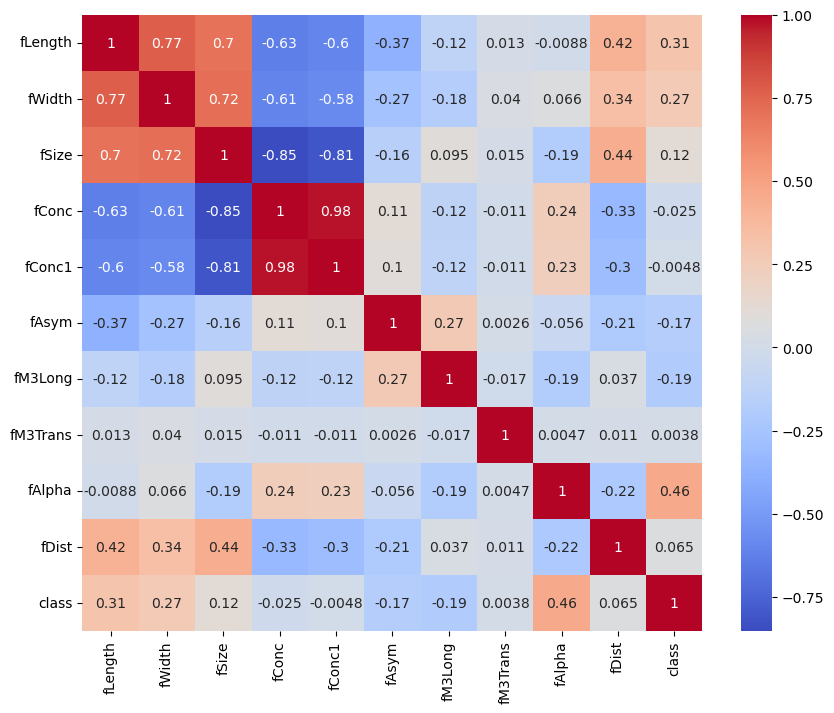

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Observing this correlation map, we can first observe that some features are really correlated to each other such as fConc and fConc1 or  fWidth, fize and fLenght. 
fConc and fSize are negatively correlated.

Now let's take a look to the correlation between feautres and the target ('class') , some features have a very low correlation coefficient ,so we can deduce that these features won't contribute much to our predictive model. 

To select which features to use for training our machine learning model, I plan to put a threshold on the correlation coefficient (absolute value) with a threshold of 0.10 . 

The features selected are: fLength, fWidth, fSize, fAsym, fM3Long, fAlpha. 


In [33]:
data_features=data[['fLength', 'fWidth', 'fSize', 'fAsym', 'fM3Long', 'fAlpha']]
data_target=data[['class']]


print(data_features.head())
print(data_target.head())



    fLength    fWidth   fSize     fAsym  fM3Long   fAlpha
0   31.6036   11.7235  2.5185   26.2722  23.8238   6.3609
1  162.0520  136.0310  4.0612  116.7410 -64.8580  76.9600
2   23.8172    9.5728  2.3385   27.2107  -6.4633  10.4490
3   75.1362   30.9205  3.1611   -5.5277  28.5525   4.6480
4   51.6240   21.1502  2.9085   50.8761  43.1887   3.6130
   class
0      0
1      0
2      0
3      0
4      0


In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data_features,data_target,test_size=0.2,random_state=42)


# ML Models

## 1. KNN Neighbours


In [15]:
#Model 1 KNN neighbours

from sklearn.neighbors import KNeighborsClassifier 

model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_train,y_train.squeeze())  # to reshape y_train 



KNeighborsClassifier(n_neighbors=3)

In [17]:
#takes a look on the metrics 

y_pred=model1.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"Precision: {precision_score(y_test,y_pred)}")
print(f"Recall: {recall_score(y_test,y_pred)}")

confusion_matrix(y_test, y_pred)

Accuracy: 0.8172975814931651
Precision: 0.7941976427923844
Recall: 0.6517857142857143


array([[2233,  227],
       [ 468,  876]])

Classifying a background event (h)  as signal(g) is worse than classifying a signal event as background.So we need to take a look at the ROC curves and the AUC score 
   

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC Score:', roc_auc)
   

ROC AUC Score: 0.8287854178765002


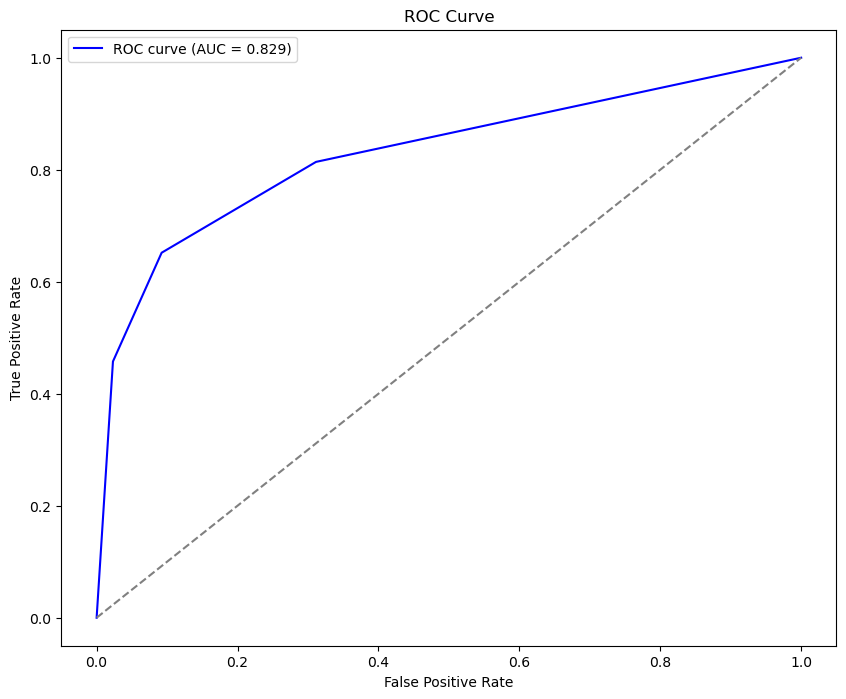

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate the ROC curve and AUC score
y_pred_proba = model1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [25]:
#let's find the best hyperparameter for model 1 we use cross validation
#we are focusing on the roc_auc score because in this problem 
#classifying a background event (h)  as signal(g) is worse than classifying a signal event as background.
   
#Reshape y_train 

y_train=y_train.squeeze()

from sklearn.model_selection import cross_val_score

k_range=range(1,100)
k_scores=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(knn,
                          x_train,
                          y_train,
                          cv=5,
                          scoring='roc_auc')
    k_scores.append(acc.mean())




the best hyperparameter ( n neighbours) is 28


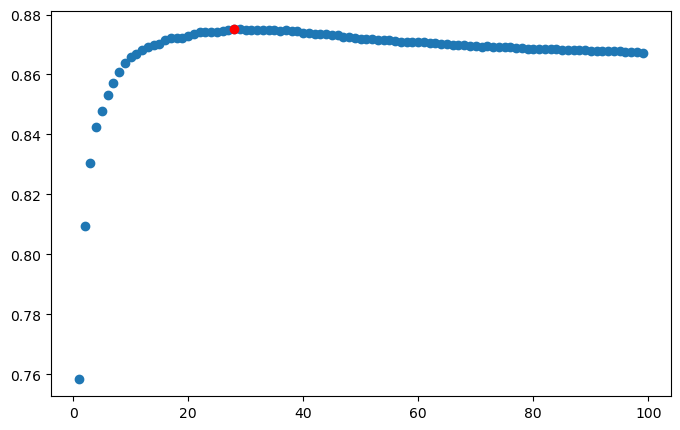

In [37]:
max=np.argmax(k_scores)
print('the best hyperparameter ( n neighbours) is',max)

plt.figure(figsize=(8,5))
plt.scatter(k_range,k_scores)
plt.plot(max,k_scores[max],'ro')
plt.show()

ROC AUC Score: 0.8804221714092142


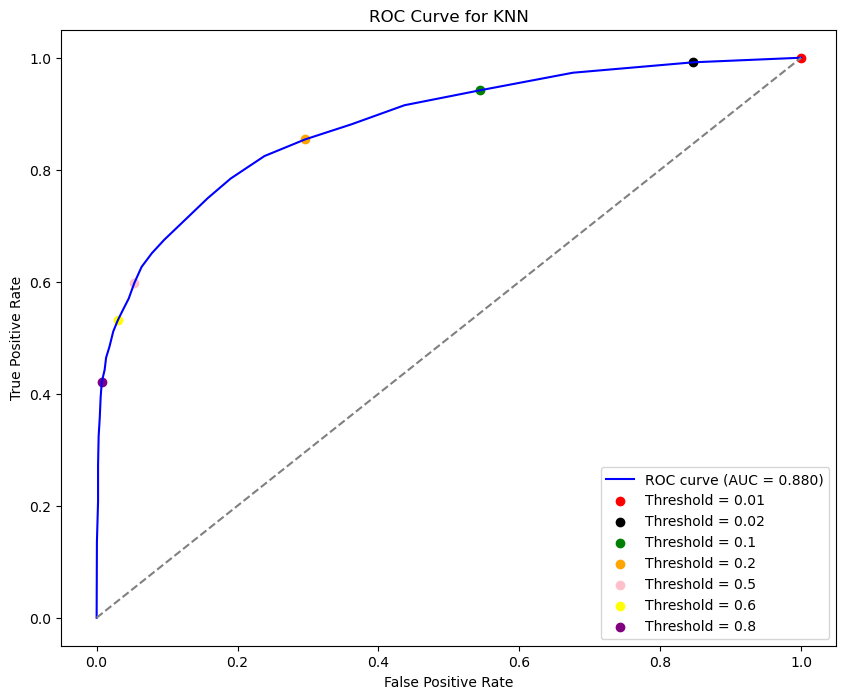

At threshold 0.01:
False Positive Rate: 1.0000
True Positive Rate: 1.0000
At threshold 0.02:
False Positive Rate: 0.8467
True Positive Rate: 0.9918
At threshold 0.1:
False Positive Rate: 0.5447
True Positive Rate: 0.9420
At threshold 0.2:
False Positive Rate: 0.2959
True Positive Rate: 0.8542
At threshold 0.5:
False Positive Rate: 0.0537
True Positive Rate: 0.5982
At threshold 0.6:
False Positive Rate: 0.0301
True Positive Rate: 0.5312
At threshold 0.8:
False Positive Rate: 0.0073
True Positive Rate: 0.4211


In [39]:
#Model1 - KNN with the best hyperparameters 

model1=KNeighborsClassifier(n_neighbors=28)
model1.fit(x_train,y_train.squeeze())

y_pred=model1.predict(x_test)
precison1=precision_score(y_test,y_pred)
y_pred_proba = model1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


# Locate the point where the threshold is closest to the threshold value we are interested in 

idx1 = np.argmin(np.abs(thresholds - 0.01))
idx2 = np.argmin(np.abs(thresholds - 0.02))
idx3 = np.argmin(np.abs(thresholds - 0.1))
idx4 = np.argmin(np.abs(thresholds - 0.2))
idx5 = np.argmin(np.abs(thresholds - 0.5))
idx6 = np.argmin(np.abs(thresholds - 0.6))
idx7 = np.argmin(np.abs(thresholds - 0.8))


roc_auc1 = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC Score:', roc_auc1)

fig_model2=plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc1:.3f})')

plt.scatter(fpr[idx1], tpr[idx1], color='red', label=f'Threshold = 0.01')
plt.scatter(fpr[idx2], tpr[idx2], color='black', label=f'Threshold = 0.02')
plt.scatter(fpr[idx3], tpr[idx3], color='green', label=f'Threshold = 0.1')
plt.scatter(fpr[idx4], tpr[idx4], color='orange', label=f'Threshold = 0.2')
plt.scatter(fpr[idx5], tpr[idx5], color='pink', label=f'Threshold = 0.5')
plt.scatter(fpr[idx6], tpr[idx6], color='yellow', label=f'Threshold = 0.6')
plt.scatter(fpr[idx7], tpr[idx7], color='purple', label=f'Threshold = 0.8')

#Save fpr ,tpr threshold 0.5 


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='best')
plt.show()

# Print relevant FPR, TPR, and threshold
print(f"At threshold 0.01:")
print(f"False Positive Rate: {fpr[idx1]:.4f}")
print(f"True Positive Rate: {tpr[idx1]:.4f}")

print(f"At threshold 0.02:")
print(f"False Positive Rate: {fpr[idx2]:.4f}")
print(f"True Positive Rate: {tpr[idx2]:.4f}")

print(f"At threshold 0.1:")
print(f"False Positive Rate: {fpr[idx3]:.4f}")
print(f"True Positive Rate: {tpr[idx3]:.4f}")

print(f"At threshold 0.2:")
print(f"False Positive Rate: {fpr[idx4]:.4f}")
print(f"True Positive Rate: {tpr[idx4]:.4f}")

print(f"At threshold 0.5:")
print(f"False Positive Rate: {fpr[idx5]:.4f}")
print(f"True Positive Rate: {tpr[idx5]:.4f}")

print(f"At threshold 0.6:")
print(f"False Positive Rate: {fpr[idx6]:.4f}")
print(f"True Positive Rate: {tpr[idx6]:.4f}")

print(f"At threshold 0.8:")
print(f"False Positive Rate: {fpr[idx7]:.4f}")
print(f"True Positive Rate: {tpr[idx7]:.4f}")


## 2. Logistic Regression 

In [41]:
#Model 2 Logistic Regression 
from sklearn.linear_model import LogisticRegression

model2=LogisticRegression()
model2.fit(x_train,y_train.values.ravel())


LogisticRegression()

In [43]:
y_pred=model2.predict(x_test)
precison2=precision_score(y_test,y_pred)

ROC AUC Score: 0.8197771486643437


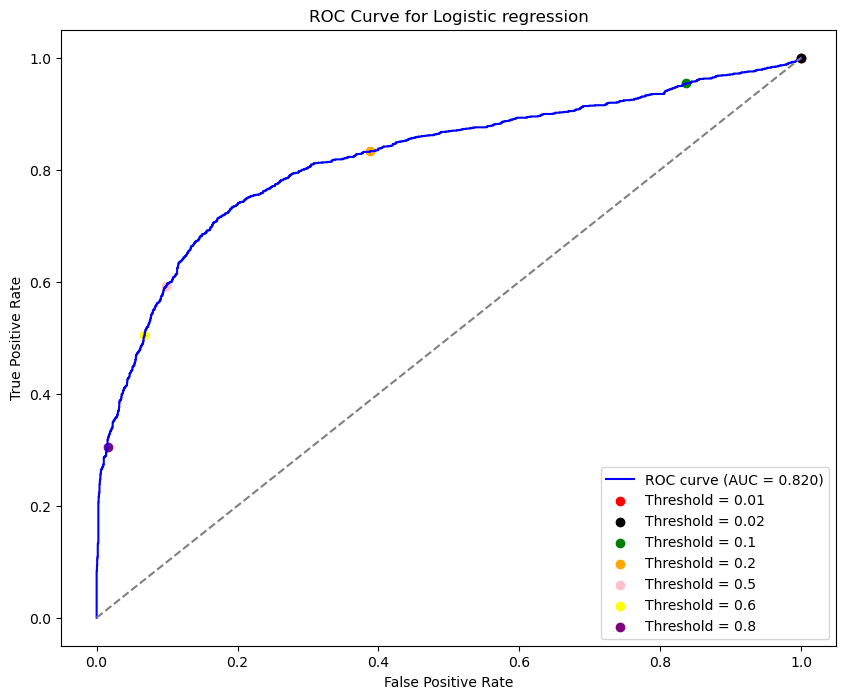

At threshold 0.01:
False Positive Rate: 1.0000
True Positive Rate: 1.0000
At threshold 0.02:
False Positive Rate: 1.0000
True Positive Rate: 1.0000
At threshold 0.1:
False Positive Rate: 0.8366
True Positive Rate: 0.9546
At threshold 0.2:
False Positive Rate: 0.3882
True Positive Rate: 0.8333
At threshold 0.5:
False Positive Rate: 0.0984
True Positive Rate: 0.5930
At threshold 0.6:
False Positive Rate: 0.0679
True Positive Rate: 0.5045
At threshold 0.8:
False Positive Rate: 0.0154
True Positive Rate: 0.3051


In [45]:
y_pred_proba = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Locate the point where the threshold is closest to the threshold value we are interested in 

idx1 = np.argmin(np.abs(thresholds - 0.01))
idx2 = np.argmin(np.abs(thresholds - 0.02))
idx3 = np.argmin(np.abs(thresholds - 0.1))
idx4 = np.argmin(np.abs(thresholds - 0.2))
idx5 = np.argmin(np.abs(thresholds - 0.5))
idx6 = np.argmin(np.abs(thresholds - 0.6))
idx7 = np.argmin(np.abs(thresholds - 0.8))


roc_auc2 = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC Score:', roc_auc2)

fig_model2=plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc2:.3f})')

plt.scatter(fpr[idx1], tpr[idx1], color='red', label=f'Threshold = 0.01')
plt.scatter(fpr[idx2], tpr[idx2], color='black', label=f'Threshold = 0.02')
plt.scatter(fpr[idx3], tpr[idx3], color='green', label=f'Threshold = 0.1')
plt.scatter(fpr[idx4], tpr[idx4], color='orange', label=f'Threshold = 0.2')
plt.scatter(fpr[idx5], tpr[idx5], color='pink', label=f'Threshold = 0.5')
plt.scatter(fpr[idx6], tpr[idx6], color='yellow', label=f'Threshold = 0.6')
plt.scatter(fpr[idx7], tpr[idx7], color='purple', label=f'Threshold = 0.8')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic regression')
plt.legend(loc='best')
plt.show()

# Print relevant FPR, TPR, and threshold
print(f"At threshold 0.01:")
print(f"False Positive Rate: {fpr[idx1]:.4f}")
print(f"True Positive Rate: {tpr[idx1]:.4f}")

print(f"At threshold 0.02:")
print(f"False Positive Rate: {fpr[idx2]:.4f}")
print(f"True Positive Rate: {tpr[idx2]:.4f}")

print(f"At threshold 0.1:")
print(f"False Positive Rate: {fpr[idx3]:.4f}")
print(f"True Positive Rate: {tpr[idx3]:.4f}")

print(f"At threshold 0.2:")
print(f"False Positive Rate: {fpr[idx4]:.4f}")
print(f"True Positive Rate: {tpr[idx4]:.4f}")

print(f"At threshold 0.5:")
print(f"False Positive Rate: {fpr[idx5]:.4f}")
print(f"True Positive Rate: {tpr[idx5]:.4f}")

print(f"At threshold 0.6:")
print(f"False Positive Rate: {fpr[idx6]:.4f}")
print(f"True Positive Rate: {tpr[idx6]:.4f}")

print(f"At threshold 0.8:")
print(f"False Positive Rate: {fpr[idx7]:.4f}")
print(f"True Positive Rate: {tpr[idx7]:.4f}")



 ## 3. Decision Tree

In [47]:
#Model 3 : a simple decision tree then we will use XGBoost 

from sklearn.tree import DecisionTreeClassifier 

# Decision tree With parameters set to default value 

model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)

from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba=model3.predict_proba(x_test)[:,1]
roc_auc2 = roc_auc_score(y_test, y_pred_proba)

print('roc_auc_score=',roc_auc2)

roc_auc_score= 0.7902547909407664


In [49]:
print(model3.get_params() ) 
print(model3.tree_.max_depth)
print(model3.min_samples_leaf)
print(model3.tree_.n_leaves)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
34
1
1805


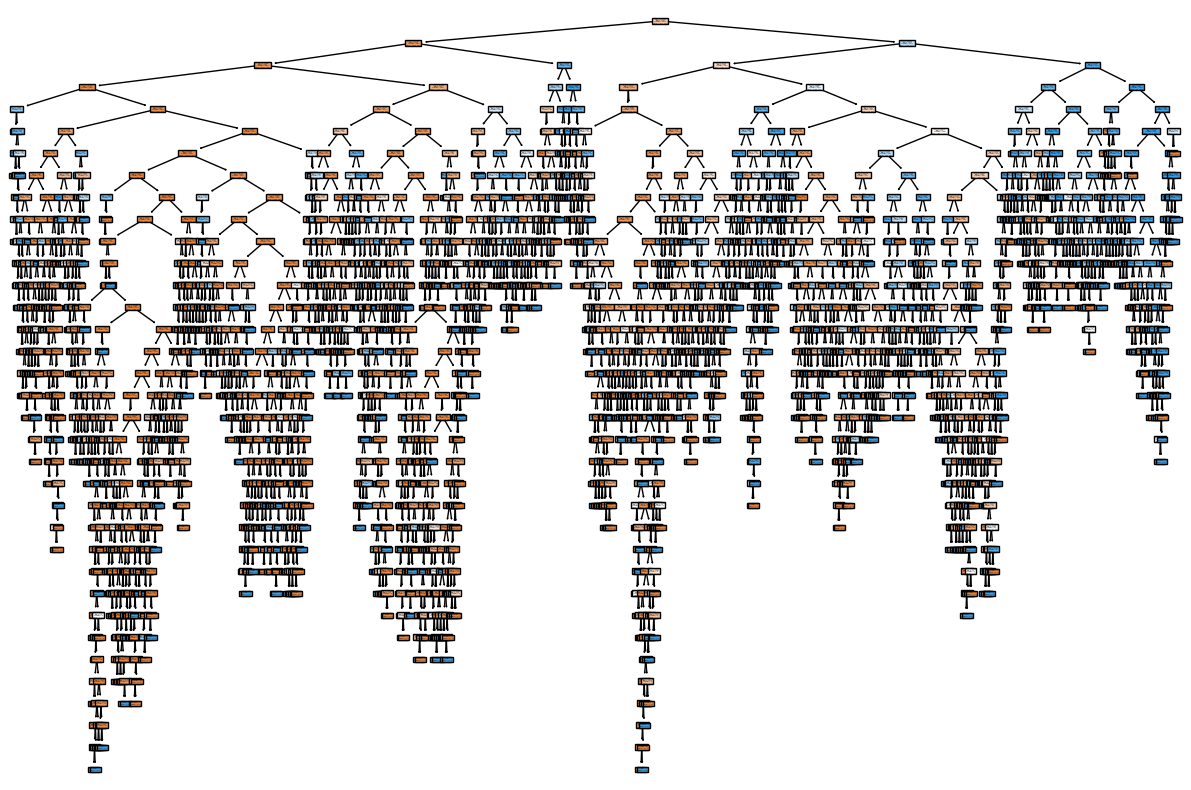

In [51]:
from sklearn.tree import plot_tree


plt.figure(figsize=(15, 10))
plot_tree(model3, filled=True)
plt.show()

### Tuning Hyperparameters Decision tree x Grid search CV 

In [52]:
#decision tree x Grid search cv 



from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV 


cv_grid =GridSearchCV(DecisionTreeClassifier(),
                   param_grid={'max_depth':[10,20,25,30,35,40,50],
                              'min_samples_leaf':[1,5,10,15]})



cv_grid.fit(x_train,y_train)




GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 25, 30, 35, 40, 50],
                         'min_samples_leaf': [1, 5, 10, 15]})

In [53]:
print(cv_grid.best_params_)

y_pred_proba=cv_grid.predict_proba(x_test)[:,1]
roc_auc3 = roc_auc_score(y_test, y_pred_proba)

print('roc_auc_score=',roc_auc3)

{'max_depth': 10, 'min_samples_leaf': 5}
roc_auc_score= 0.8789540384243127


In [54]:
y_pred=cv_grid.predict(x_test)
precison3=precision_score(y_test,y_pred)

## 4. XGBoost

In [59]:
#Model4 
#XGBOOST 
#Let's combine it with cv grid research so we get the best hyperparameters 


from xgboost import XGBClassifier


xgb_model=XGBClassifier()

param_grid = {
    'n_estimators': [50, 100,200,300,400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.8, 1.0]
}

# Recherche avec GridSearchCV
cv_grid4 = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Peut être ajusté selon votre problème (par ex. 'roc_auc' pour classification binaire)
    cv=3,
    verbose=1,
    n_jobs=-1  # Utilise tous les cœurs disponibles pour accélérer la recherche
)

cv_grid4.fit(x_train,y_train)


Fitting 3 folds for each of 135 candidates, totalling 405 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='roc_auc', verbose=1)

In [60]:
print(cv_grid4.best_params_)


y_pred_proba=cv_grid4.predict_proba(x_test)[:,1]
roc_auc4 = roc_auc_score(y_test, y_pred_proba)

print('roc_auc_score=',roc_auc4)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
roc_auc_score= 0.9208835414247001


In [63]:
y_pred=cv_grid4.predict(x_test)
precison4=precision_score(y_test,y_pred)

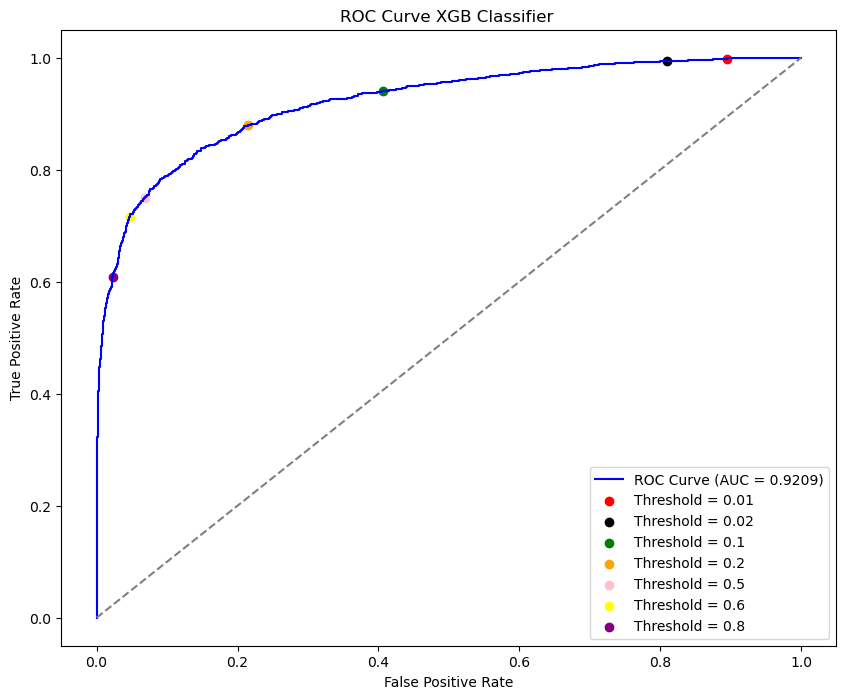

At threshold 0.01:
False Positive Rate: 0.8943
True Positive Rate: 0.9985
At threshold 0.02:
False Positive Rate: 0.8102
True Positive Rate: 0.9940
At threshold 0.1:
False Positive Rate: 0.4069
True Positive Rate: 0.9397
At threshold 0.2:
False Positive Rate: 0.2146
True Positive Rate: 0.8795
At threshold 0.5:
False Positive Rate: 0.0691
True Positive Rate: 0.7493
At threshold 0.6:
False Positive Rate: 0.0467
True Positive Rate: 0.7150
At threshold 0.8:
False Positive Rate: 0.0228
True Positive Rate: 0.6079


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


y_pred_proba=cv_grid4.predict_proba(x_test)[:,1] # Predicted probabilities for class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Locate the point where the threshold is closest to the threshold value we are interested in 

idx1 = np.argmin(np.abs(thresholds - 0.01))
idx2 = np.argmin(np.abs(thresholds - 0.02))
idx3 = np.argmin(np.abs(thresholds - 0.1))
idx4 = np.argmin(np.abs(thresholds - 0.2))
idx5 = np.argmin(np.abs(thresholds - 0.5))
idx6 = np.argmin(np.abs(thresholds - 0.6))
idx7 = np.argmin(np.abs(thresholds - 0.8))


# Plot the ROC curve

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.4f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.scatter(fpr[idx1], tpr[idx1], color='red', label=f'Threshold = 0.01')
plt.scatter(fpr[idx2], tpr[idx2], color='black', label=f'Threshold = 0.02')
plt.scatter(fpr[idx3], tpr[idx3], color='green', label=f'Threshold = 0.1')
plt.scatter(fpr[idx4], tpr[idx4], color='orange', label=f'Threshold = 0.2')
plt.scatter(fpr[idx5], tpr[idx5], color='pink', label=f'Threshold = 0.5')
plt.scatter(fpr[idx6], tpr[idx6], color='yellow', label=f'Threshold = 0.6')
plt.scatter(fpr[idx7], tpr[idx7], color='purple', label=f'Threshold = 0.8')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGB Classifier ')
plt.legend(loc='best')
plt.show()

# Print some relevant FPR, TPR, and threshold
print(f"At threshold 0.01:")
print(f"False Positive Rate: {fpr[idx1]:.4f}")
print(f"True Positive Rate: {tpr[idx1]:.4f}")

print(f"At threshold 0.02:")
print(f"False Positive Rate: {fpr[idx2]:.4f}")
print(f"True Positive Rate: {tpr[idx2]:.4f}")

print(f"At threshold 0.1:")
print(f"False Positive Rate: {fpr[idx3]:.4f}")
print(f"True Positive Rate: {tpr[idx3]:.4f}")

print(f"At threshold 0.2:")
print(f"False Positive Rate: {fpr[idx4]:.4f}")
print(f"True Positive Rate: {tpr[idx4]:.4f}")

print(f"At threshold 0.5:")
print(f"False Positive Rate: {fpr[idx5]:.4f}")
print(f"True Positive Rate: {tpr[idx5]:.4f}")

print(f"At threshold 0.6:")
print(f"False Positive Rate: {fpr[idx6]:.4f}")
print(f"True Positive Rate: {tpr[idx6]:.4f}")

print(f"At threshold 0.8:")
print(f"False Positive Rate: {fpr[idx7]:.4f}")
print(f"True Positive Rate: {tpr[idx7]:.4f}")

## 5. DNN (Dense Neural network) 

In [67]:
#Model 5
##Using a deep neural network to do a classification 
#we'll choose a Dense neural network 


import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input

#2 hiddens layers 
model=Sequential()
model.add(Input(shape=(6,)))  #We have 6 features 
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))   #Output layers , we use sigmoid activiton function because it is a binary classification


model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_split=0.2,epochs=100 )



Epoch 1/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.6722 - loss: 0.8514 - val_accuracy: 0.7923 - val_loss: 0.4810
Epoch 2/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.7848 - loss: 0.4627 - val_accuracy: 0.8061 - val_loss: 0.4299
Epoch 3/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8165 - loss: 0.4353 - val_accuracy: 0.8097 - val_loss: 0.4312
Epoch 4/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8066 - loss: 0.4295 - val_accuracy: 0.8206 - val_loss: 0.4124
Epoch 5/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8080 - loss: 0.4383 - val_accuracy: 0.8130 - val_loss: 0.4358
Epoch 6/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8140 - loss: 0.4232 - val_accuracy: 0.8248 - val_loss: 0.4110
Epoch 7/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8208 - loss: 0.4152 - val_accuracy: 0.7986 - val_loss: 0.4698
Epoch 8/100
381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8228 - loss: 0

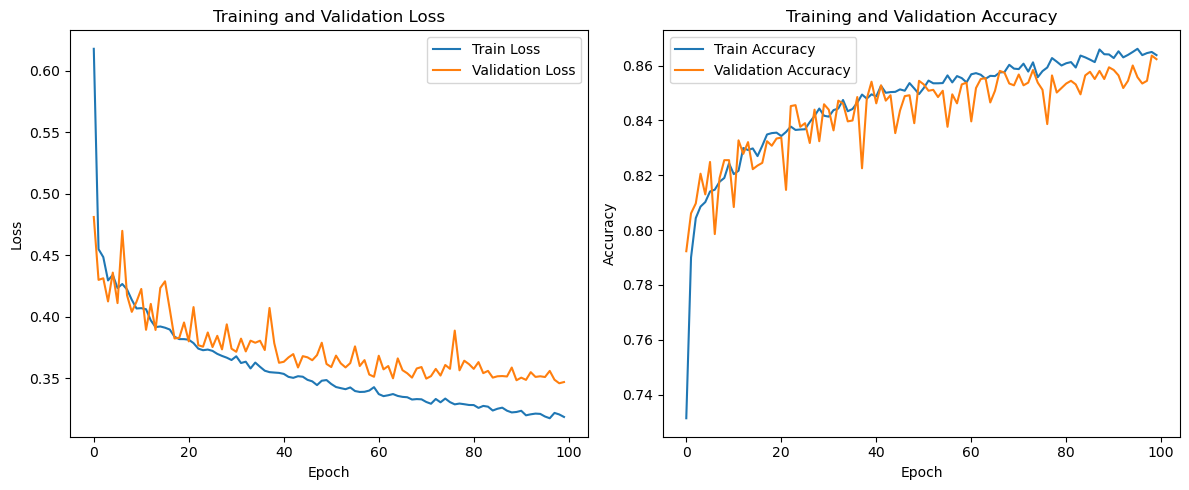

In [68]:
#let's visualize if our model is correct by analysing the validation and training accuracy/loss 

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

Both graphics show no sign of overfitting

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step


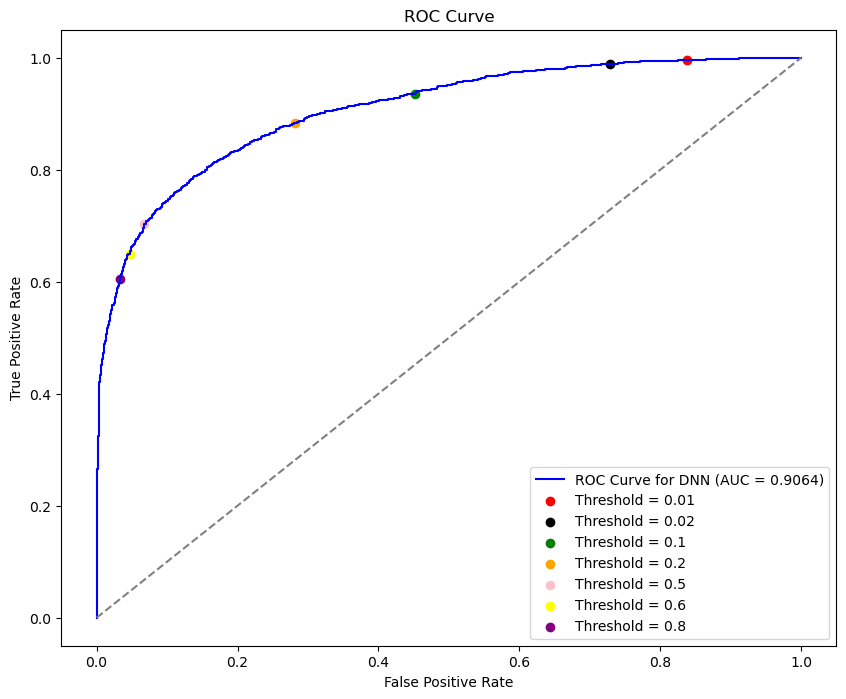

At threshold 0.01:
False Positive Rate: 0.8378
True Positive Rate: 0.9955
At threshold 0.02:
False Positive Rate: 0.7293
True Positive Rate: 0.9896
At threshold 0.1:
False Positive Rate: 0.4524
True Positive Rate: 0.9360
At threshold 0.2:
False Positive Rate: 0.2809
True Positive Rate: 0.8839
At threshold 0.5:
False Positive Rate: 0.0675
True Positive Rate: 0.7024
At threshold 0.6:
False Positive Rate: 0.0467
True Positive Rate: 0.6503
At threshold 0.8:
False Positive Rate: 0.0325
True Positive Rate: 0.6049


In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming `model` outputs predicted probabilities for the positive class
y_pred_proba = model.predict(x_test) # Predicted probabilities for class 1

roc_auc5=roc_auc_score(y_test, y_pred_proba)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Locate the point where the threshold is closest to the threshold value we are interested in 

idx1 = np.argmin(np.abs(thresholds - 0.01))
idx2 = np.argmin(np.abs(thresholds - 0.02))
idx3 = np.argmin(np.abs(thresholds - 0.1))
idx4 = np.argmin(np.abs(thresholds - 0.2))
idx5 = np.argmin(np.abs(thresholds - 0.5))
idx6 = np.argmin(np.abs(thresholds - 0.6))
idx7 = np.argmin(np.abs(thresholds - 0.7))


# Plot the ROC curve

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label='ROC Curve for DNN (AUC = {:.4f})'.format(roc_auc_score(y_test, y_pred_proba)))

plt.scatter(fpr[idx1], tpr[idx1], color='red', label=f'Threshold = 0.01')
plt.scatter(fpr[idx2], tpr[idx2], color='black', label=f'Threshold = 0.02')
plt.scatter(fpr[idx3], tpr[idx3], color='green', label=f'Threshold = 0.1')
plt.scatter(fpr[idx4], tpr[idx4], color='orange', label=f'Threshold = 0.2')
plt.scatter(fpr[idx5], tpr[idx5], color='pink', label=f'Threshold = 0.5')
plt.scatter(fpr[idx6], tpr[idx6], color='yellow', label=f'Threshold = 0.6')
plt.scatter(fpr[idx7], tpr[idx7], color='purple', label=f'Threshold = 0.8')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Print relevant FPR, TPR, and threshold
print(f"At threshold 0.01:")
print(f"False Positive Rate: {fpr[idx1]:.4f}")
print(f"True Positive Rate: {tpr[idx1]:.4f}")

print(f"At threshold 0.02:")
print(f"False Positive Rate: {fpr[idx2]:.4f}")
print(f"True Positive Rate: {tpr[idx2]:.4f}")

print(f"At threshold 0.1:")
print(f"False Positive Rate: {fpr[idx3]:.4f}")
print(f"True Positive Rate: {tpr[idx3]:.4f}")

print(f"At threshold 0.2:")
print(f"False Positive Rate: {fpr[idx4]:.4f}")
print(f"True Positive Rate: {tpr[idx4]:.4f}")

print(f"At threshold 0.5:")
print(f"False Positive Rate: {fpr[idx5]:.4f}")
print(f"True Positive Rate: {tpr[idx5]:.4f}")

print(f"At threshold 0.6:")
print(f"False Positive Rate: {fpr[idx6]:.4f}")
print(f"True Positive Rate: {tpr[idx6]:.4f}")

print(f"At threshold 0.8:")
print(f"False Positive Rate: {fpr[idx7]:.4f}")
print(f"True Positive Rate: {tpr[idx7]:.4f}")


# Summarize 

We did the binary classification with different algorithms let's talk about each performance. 


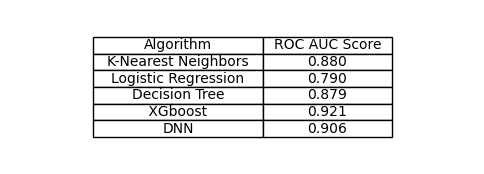

In [79]:
import matplotlib.pyplot as plt
import pandas as pd


dataframe = {
    "Algorithm": ["K-Nearest Neighbors","Logistic Regression", "Decision Tree"," XGboost ", "DNN"],
    "ROC AUC Score":  [f"{roc_auc1:.3f}", f"{roc_auc2:.3f}", f"{roc_auc3:.3f}", f"{roc_auc4:.3f}", f"{roc_auc5:.3f}"] 
}

df = pd.DataFrame(dataframe)


fig, ax = plt.subplots(figsize=(6, 2))  
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.show()


Looking at the ROC_auc score, the best model to do our binary classification is obviously XGboost algorithm. 
We obtain a score of 0.92. 
Lookng at the curve, for a threshold of 0.5, 
We obtain :
False Positive Rate: 0.0691 which mean 7% of background events (the negative class H) are incorrectly classified as signal (positive class G). 
True Positive Rate: 0.7493  which mean that 74% of signal events (positive class G) are correctly identified as signal.

We can compare this to the DNN model which has a roc auc score of 0.90
at the same threshold of 0.5 ,we observe: 
False Positive Rate: 0.0902
True Positive Rate: 0.7262

These 2 models is the only ones that achieve a fpr under <= 0.1 and which the tpr is above 0.7. A Good Ratio.

